In [115]:
# Import Libraries
import pandas as pd
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [170]:
# Get Data
df = pd.read_csv("https://raw.githubusercontent.com/veeranalytics/Forecasting-RNN-Python/master/Sales_Data.csv", usecols=[1], engine='python')

In [171]:
# Get a look at the dataset
df.head()

,Sales
0,112
1,118
2,132
3,129
4,121


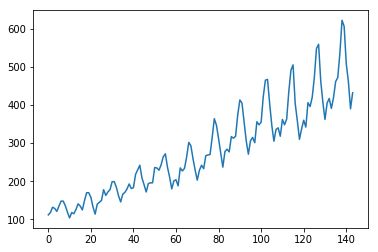

In [172]:
# Explore Trend of the data
plt.plot(df)
plt.show()

In [174]:
# Convert data frame into float arrays
data = df.values
data = data.astype('float32')

# Check the type of data
type(data)

numpy.ndarray

In [175]:
# Set seed for reproducibility
np.random.seed(123)

In [176]:
# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

In [181]:
# Split data into train and test sets
# As sequence is important keeping data for the first 29 periods in training dataset
# The reamining 07 periods are in the test dataset
train_size = int(len(data) * 0.83)
test_size = len(data) - train_size
train, test = data[0:train_size,:], data[train_size:len(data),:]
print(len(train), len(test))

119 25


In [192]:
# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [193]:
# Reshape into X=t and Y=t+1
look_back = 1 # Can Change accordingly to requirement
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

In [194]:
# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [195]:
# Create and Fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 1s - loss: 0.0738
Epoch 2/100
 - 0s - loss: 0.0335
Epoch 3/100
 - 0s - loss: 0.0248
Epoch 4/100
 - 0s - loss: 0.0223
Epoch 5/100
 - 0s - loss: 0.0199
Epoch 6/100
 - 0s - loss: 0.0175
Epoch 7/100
 - 0s - loss: 0.0151
Epoch 8/100
 - 0s - loss: 0.0128
Epoch 9/100
 - 0s - loss: 0.0107
Epoch 10/100
 - 0s - loss: 0.0089
Epoch 11/100
 - 0s - loss: 0.0073
Epoch 12/100
 - 0s - loss: 0.0060
Epoch 13/100
 - 0s - loss: 0.0050
Epoch 14/100
 - 0s - loss: 0.0043
Epoch 15/100
 - 0s - loss: 0.0038
Epoch 16/100
 - 0s - loss: 0.0035
Epoch 17/100
 - 0s - loss: 0.0033
Epoch 18/100
 - 0s - loss: 0.0032
Epoch 19/100
 - 0s - loss: 0.0031
Epoch 20/100
 - 0s - loss: 0.0032
Epoch 21/100
 - 0s - loss: 0.0031
Epoch 22/100
 - 0s - loss: 0.0030
Epoch 23/100
 - 0s - loss: 0.0031
Epoch 24/100
 - 0s - loss: 0.0030
Epoch 25/100
 - 0s - loss: 0.0030
Epoch 26/100
 - 0s - loss: 0.0031
Epoch 27/100
 - 0s - loss: 0.0030
Epoch 28/100
 - 0s - loss: 0.0031
Epoch 29/100
 - 0s - loss: 0.0030
Epoch 30/100
 - 0s - lo

In [198]:
# Make predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

In [199]:
# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])

In [200]:
# Calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 27.72 RMSE
Test Score: 50.70 RMSE


In [211]:
# Shift train predictions for plotting
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[2:119, :] = trainPredict

In [212]:
# Shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[119:142, :] = testPredict

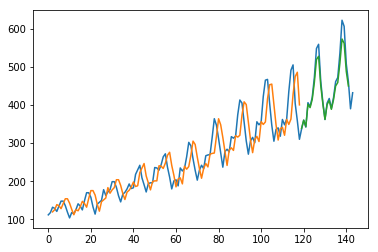

In [213]:
# Plot baseline and predictions
# Colors:
# Blue-- Actual Data
# Orange-- Forecasting on Training dataset
# Gree-- Forecasting on Test dataset
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()